In [117]:
#importing necessery libraries for data wrangling
import os
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
os.getcwd()

'C:\\Users\\spider\\Documents\\Springboard\\GitHub\\NYC-Airbnb\\DataWrangling\\Data_wrangling'

In [87]:
os.chdir(r'C:\Users\spider\Documents\Springboard\GitHub\NYC-Airbnb\DataWrangling\Data_wrangling')

In [88]:
# Loading the NYC Airbnb data file from the directory
raw_data = pd.read_csv("AB_NYC_2019.csv")

In [89]:
raw_data.head(8)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220


In [90]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [91]:
raw_data["last_review"] = pd.to_datetime(raw_data["last_review"])

In [92]:
assert raw_data["last_review"].dtypes == 'datetime64[ns]'

In [93]:
raw_data["neighbourhood_group"].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [94]:
raw_data["neighbourhood_group"] = raw_data["neighbourhood_group"].astype('category')

In [95]:
raw_data["neighbourhood"].value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Woodrow                  1
Rossville                1
Richmondtown             1
Fort Wadsworth           1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

In [96]:
len(raw_data.neighbourhood.unique())

221

In [97]:
raw_data["neighbourhood"] = raw_data["neighbourhood"].astype('category')

In [98]:
raw_data["room_type"].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [99]:
raw_data["room_type"] = raw_data["room_type"].astype('category')

In [100]:
assert raw_data["room_type"].dtypes == 'category'

In [101]:
raw_data.describe(include = 'all').T

C:\Users\spider\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
id,48895,NaN,NaN,NaN,NaT,NaT,1.90171e+07,1.09831e+07,2539,9.47194e+06,1.96773e+07,2.91522e+07,3.64872e+07
name,48879,47905,Hillside Hotel,18,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,48895,NaN,NaN,NaN,NaT,NaT,6.762e+07,7.8611e+07,2438,7.82203e+06,3.07938e+07,1.07434e+08,2.74321e+08
host_name,48874,11452,Michael,417,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood_group,48895,5,Manhattan,21661,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood,48895,221,Williamsburg,3920,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,48895,NaN,NaN,NaN,NaT,NaT,40.7289,0.0545301,40.4998,40.6901,40.7231,40.7631,40.9131
longitude,48895,NaN,NaN,NaN,NaT,NaT,-73.9522,0.0461567,-74.2444,-73.9831,-73.9557,-73.9363,-73.713
room_type,48895,3,Entire home/apt,25409,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,48895,NaN,NaN,NaN,NaT,NaT,152.721,240.154,0,69,106,175,10000


In [103]:
count = raw_data.isnull().sum().sort_values(ascending=False)
percent = (raw_data.isnull().sum())/raw_data.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([count, percent], axis=1, keys=['Count','Percent'], sort=False).sort_values('Count', ascending=False)
missing_data.head(40)

,Count,Percent
reviews_per_month,10052,0.205583
last_review,10052,0.205583
host_name,21,0.000429
name,16,0.000327
availability_365,0,0.000000
calculated_host_listings_count,0,0.000000
number_of_reviews,0,0.000000
minimum_nights,0,0.000000
price,0,0.000000
room_type,0,0.000000


In [104]:
raw_data.fillna({'reviews_per_month':0}, inplace=True)

In [105]:
raw_data.reviews_per_month.isnull().sum()

0

In [106]:
raw_data['last_review'].isnull().sum()

10052

In [107]:
min(raw_data['last_review'])

Timestamp('2011-03-28 00:00:00')

In [108]:
earliest = min(raw_data['last_review'])
raw_data['last_review'] = raw_data['last_review'].fillna(earliest)
raw_data['last_review'] = raw_data['last_review'].apply(lambda x: x.toordinal() - earliest.toordinal())

In [109]:
#dropping columns that are not significant or could be unethical to use for our future data exploration and predictions
raw_data.drop(['host_name','name'], axis=1, inplace=True)

In [110]:
count = raw_data.isnull().sum().sort_values(ascending=False)
percent = (raw_data.isnull().sum())/raw_data.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([count, percent], axis=1, keys=['Count','Percent'], sort=False).sort_values('Count', ascending=False)
missing_data.head(40)

,Count,Percent
availability_365,0,0.0
calculated_host_listings_count,0,0.0
reviews_per_month,0,0.0
last_review,0,0.0
number_of_reviews,0,0.0
minimum_nights,0,0.0
price,0,0.0
room_type,0,0.0
longitude,0,0.0
latitude,0,0.0


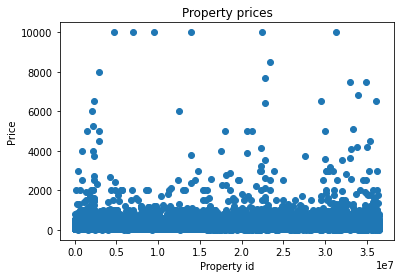

In [114]:
plt.scatter(x='id', y='price', data = raw_data)
plt.title('Property prices')
plt.xlabel('Property id')
plt.ylabel('Price')
plt.show()

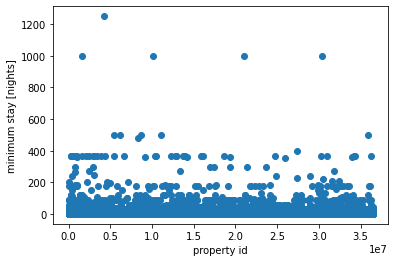

In [124]:
plt.scatter(x='id', y='minimum_nights', data = raw_data)
plt.xlabel('property id')
plt.ylabel('minimum stay [nights]')
plt.show()

C:\Users\spider\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'count')

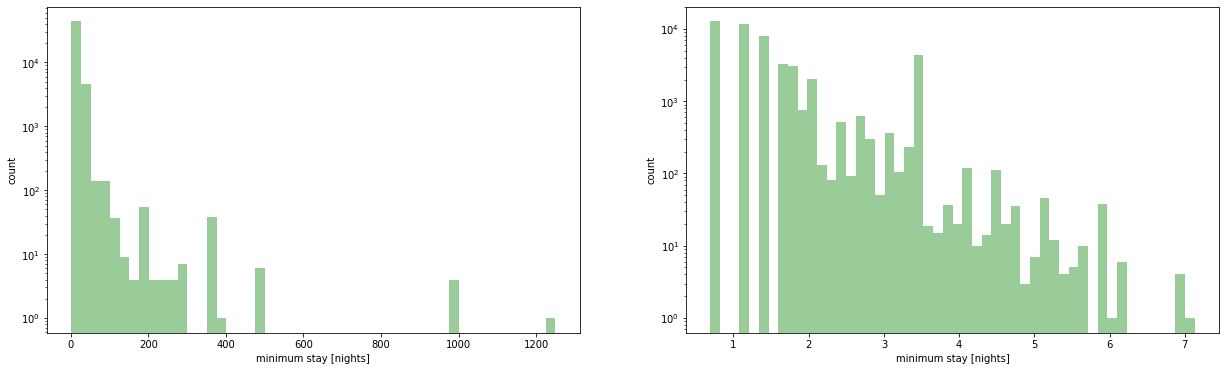

In [122]:
fig, axes = plt.subplots(1,2, figsize=(21, 6))

sns.distplot(raw_data['minimum_nights'], rug=False, kde=False, color="green", ax = axes[0])
axes[0].set_yscale('log')
axes[0].set_xlabel('minimum stay [nights]')
axes[0].set_ylabel('count')

sns.distplot(np.log1p(raw_data['minimum_nights']), rug=False, kde=False, color="green", ax = axes[1])
axes[1].set_yscale('log')
axes[1].set_xlabel('minimum stay [nights]')
axes[1].set_ylabel('count')

In [125]:
datapath = 'C:\\Users\\spider\\Documents\\Springboard\\GitHub\\NYC-Airbnb\\DataWrangling\\Data_wrangling'
# renaming the output data directory and re-running this notebook, for example,
# will recreate this (empty) directory and resave the data files.
# NB this is not a substitute for a modern data pipeline, for which there are
# various tools. However, for our purposes here, and often in a "one off" analysis,
# this is useful because we have to deliberately move/delete our data in order
# to overwrite it.
if not os.path.exists(datapath):
    os.mkdir(datapath)

In [126]:
datapath_airbnbdata = os.path.join(datapath, 'airbnb_data_cleaned.csv')
if not os.path.exists(datapath_airbnbdata):
    raw_data.to_csv(datapath_airbnbdata, index=False)